In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Создание вектора состояния

Полезные данные:
- Получаемые от пользователя:
    - тип пользователя;
    - возраст (по выбору PCA см. datasets_analises.ipynb (Analize->Students));
    - способ перемещение (от этого зависит построение MDP, т.к. создаёт новые пути, ограничивая другие);
    - наличие ограничений (от этого зависит построение MDP, т.к. ограничивает некоторые пути);
- Получаемые от отделения:
    - рейтинг (общее качество отделение);
    - предоставляемые услуги (от этого зависит не только можем ли мы отправить юзера туда, но и нагрузка на само отделение);
    - отдалённость от местоположения пользователя;
    - загруженность;
    - скорость обработки услуг;
    - окружение отделения (https://cyberleninka.ru/article/n/razmeschenie-otdeleniy-banka-obzor-problemy/viewer)
- Доп. данные:
    - погода;
    - сложность пути;


# Вероятность выбора от растояния и возраста

C:\Users\Mike\AppData\Local\Temp\ipykernel_29428\2930621059.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels({'size': 0})
C:\Users\Mike\AppData\Local\Temp\ipykernel_29428\2930621059.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels({'size': 0})


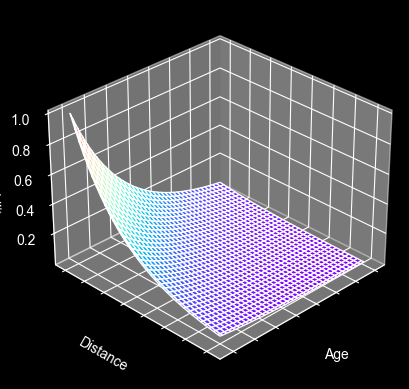

In [18]:
sb.set_style("dark", {'axes.grid' : False})
mean_plot = 3
num = 40
plt.style.use('dark_background')
age = np.arange(18, 90)
distance = np.arange(0.5, 20, ((20 - 0.5) / age.shape[0]))
age_i = np.arange(age.shape[0])
distance_i = np.arange(distance.shape[0])
plot1, plot2 = np.meshgrid(age_i, distance_i)
lamb = 0.04
prop = lamb * np.exp(-lamb * ((108-plot1) + 1.05*(plot2)))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("Age")
ax.set_ylabel("Distance")
ax.set_zlabel("Propability")
ax.set_xticklabels({'size': 0})
ax.set_yticklabels({'size': 0})
ax.plot_surface(plot1, plot2, prop / prop.max(), cmap=cm.rainbow)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.view_init(30, 45)
plt.show()

In [30]:
p1, p2 = np.meshgrid(age, distance)

In [241]:
def a(lamb):
    r = ((lamb * np.exp(-lamb * (1*(108-p1) + 10*(p2)))).sum() - 1)**2
    return r

In [242]:
scipy.optimize.minimize(
    a, 
    np.zeros(1), 
    method='nelder-mead',
    options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 16
         Function evaluations: 32


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.1860485918939458e-10
             x: [ 1.990e-04]
           nit: 16
          nfev: 32
 final_simplex: (array([[ 1.990e-04],
                       [ 1.990e-04]]), array([ 1.186e-10,  6.904e-10]))

In [243]:
a(1.990e-04)

5.030654406757376e-08

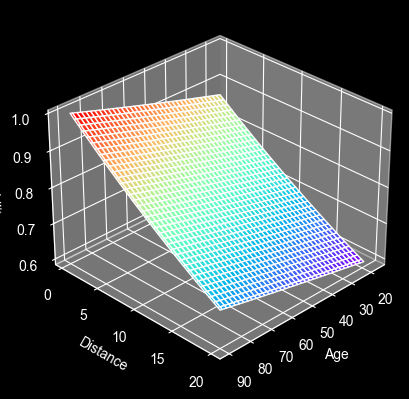

In [244]:
sb.set_style("dark", {'axes.grid' : False})
mean_plot = 3
num = 40
plt.style.use('dark_background')
age = np.arange(18, 90)
distance = np.arange(0.5, 20, ((20 - 0.5) / age.shape[0]))
age_i = np.arange(age.shape[0])
distance_i = np.arange(distance.shape[0])
plot1, plot2 = np.meshgrid(age, distance)
lamb = 1.990e-04
prop = lamb * np.exp(-lamb * (10*(108-plot1) + 100*(plot2)))

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("Age")
ax.set_ylabel("Distance")
ax.set_zlabel("Propability")
# ax.set_xticklabels({'size': 0})
# ax.set_yticklabels({'size': 0})
ax.plot_surface(plot1, plot2, prop / prop.max(), cmap=cm.rainbow)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.view_init(30, 45)
plt.show()

На вряд-ли пенсионеры смогут далеко ходить, а молодые смогут $\Rightarrow$ показательное распределение. Такая же ситуация сохраняется у пары погода и дистанция.

По графику хорошо подходит параметр $\lambda=3.049\cdot 10^{-4}$

In [251]:
def get_propability_of_walk_age(age: float, distance: float):
    lamb = 1.990e-04
    prop = lamb * np.exp(-lamb * (1*(108-age) + 10*(distance)))
    return prop

# Вероятность выбора отделение от скорость обработки услуг и загруженности

# Вероятность выбора отделение от рейтинга

In [168]:
import pickle
import dill

In [169]:
with open('models/raiting_check/raiting_checkout_pred_tree.pkl', 'rb') as f:
    raiting_checkout_pred_tree = pickle.load(f)

In [170]:
with open('models/raiting_check/pf.pkl', 'rb') as f:
    pf = pickle.load(f)

In [171]:
with open('models/raiting_check/dataset_preprocessor_for_raiting.pkl', 'rb') as f:
    dataset_preprocessor_for_raiting = dill.load(f)

In [172]:
with open('models/raiting_check/std_scaler_for_raiting.pkl', 'rb') as f:
    std_scaler_for_raiting = dill.load(f)

In [173]:
import pandas as pd

In [191]:
raiting_checkout_pred_tree.predict(dataset_preprocessor_for_raiting([3.8], pf, std_scaler_for_raiting))*100

array([0.2277127])

In [193]:
def propability_of_checkout_branch_by_raiting(raiting: float):
    return raiting_checkout_pred_tree.predict(dataset_preprocessor_for_raiting([raiting], pf, std_scaler_for_raiting))*100

# Влияние наличие транспорта на дальность пути.

Среднее расстояние, преодолеваемое за одну поездку, составило 21,35км 
https://autoreview.ru/articles/proverka-na-dorogah/nauka-i-zhizn-1

В теории градостроительства считают, что передвижение в городе с помощью транспорта на дальность 500 м нецелесообразно, так как два пешеходных подхода в среднем составляют менее 500 м. https://dzen.ru/a/ZMNH6usEhELjUw5I

В отношении близости жилья и места работы выяснилось, что расстояние «на работу» в среднем составило 4,7 км. И это максимальный показатель из средних дистанций по «номенклатуре» целей обследования. Минимальный составил 2,5 км для передвижений «за покупками» https://gorod.hse.ru/data/2019/10/03/1543009503/%D0%A2%D0%BE%D0%BC%203%202%202018_for_print_compressed.pdf


Таким образом, мы можем, что вероятность у нас дискретная $\Rightarrow$ имеются точки разрыва характерезующие предпочтение транспорта по расстоянию.

In [175]:
def get_propability_for_checkout_transport(distance: float):
    return np.random.choice([0,1], 1, p=[4.7 / distance, 1 - 4.7 / distance])[0]

In [176]:
get_propability_for_checkout_transport(21.35)

0

# Влияние транспорта на растояние

В предложенной Г.В.Шелейховским математической модели расселения за основу была принята логарифмическая функция:

$$f(t) = \frac{1}{T} \cdot \ln(\frac{T}{t}) = \frac{\ln(T)}{T} - \frac{\ln(t)}{T}\;\text{[с/км]} \Rightarrow k = \frac{T}{ln(t)} + C = \frac{T}{x-\frac{x^2}{2}+\frac{x^3}{3}} + C \Rightarrow \int\frac{T}{x-\frac{x^2}{2}+\frac{x^3}{3}}dx = \frac{-4Tx\ln(|x|)-6T+4Tx\ln(|3+2x|)}{3x}[км]$$

где T коэфицент объёма города, а x - среднее время
https://dzen.ru/a/ZMNH6usEhELjUw5I

In [177]:
def change_distance_by_transport(time:float, city_size: float):
    '''
        time [km/s]
        city_size [km]
    '''
    return (-4 * city_size * time * np.log(time) - 6 * city_size + 4 * city_size * time * np.log(3 + 2 * time))/(3 * time)

In [178]:
1-change_distance_by_transport(2/5, 2)

4.996555203716012

# Create Env

In [196]:
import torch

In [260]:
def from_vector_to_dict(vector: iter):
    return {
        'type_of_customer': vector[0],
        'age': vector[1],
        'transport_type': vector[2],
        'disability': vector[3],
        'rating': vector[4],
        'customer_can_be_processed': vector[5],
        'distance': vector[6],
        'loading_of_branch': vector[7],
        'speed_of_execution': vector[8],
        'quality_of_district': vector[9],
        'weather_quality': vector[10],
    }

In [261]:
class Env:
    def __init__(self,
        get_propability_for_checkout_transport: callable,
        change_distance_by_transport: callable,
        get_propability_of_walk_age: callable,
        propability_of_checkout_branch_by_raiting: callable
    ):
        self.get_propability_for_checkout_transport = get_propability_for_checkout_transport
        self.change_distance_by_transport = change_distance_by_transport
        self.get_propability_of_walk_age = get_propability_of_walk_age
        self.propability_of_checkout_branch_by_raiting = propability_of_checkout_branch_by_raiting

    def step(self, state: dict):
        if state['customer_can_be_processed'] == 0:
            return 0
        auto_check = 0 if state['transport_type'] == 0 else self.get_propability_for_checkout_transport(state['distance'])
        speed = max(25, 55 * state['weather_quality']) if auto_check==1 else 5
        distance = state['distance'] * (1 - self.change_distance_by_transport(state['distance'] / speed, 0.5))
        propability_of_walk_dist_and_age = self.get_propability_of_walk_age(distance=distance, age=state['age'])
        quality_of_district = state['quality_of_district']
        propability_of_check_branch_by_raiting = self.propability_of_checkout_branch_by_raiting(state['rating'])[0]*100
        return propability_of_check_branch_by_raiting * propability_of_walk_dist_and_age



In [262]:
env_ex = Env(
    get_propability_for_checkout_transport=get_propability_for_checkout_transport,
    change_distance_by_transport=change_distance_by_transport,
    get_propability_of_walk_age=get_propability_of_walk_age,
    propability_of_checkout_branch_by_raiting=propability_of_checkout_branch_by_raiting
)

In [263]:
env_ex.step(
    state=from_vector_to_dict(torch.tensor(
        [0, 25, 0, 0, 4, 1, 12, 5, 1, 5, 10]
    ).numpy())
)

0.030060051719937406